####  1. Load important libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Paired permutation test

In [2]:
# ---------------------------
# Simulated RC Data: Significant difference 
# ---------------------------

# FES Group (Significant)
pre_rec_SMN_cfes_sig = np.array([0.50, 0.52, 0.54, 0.51, 0.53, 0.50, 0.55, 0.52, 0.51, 0.53])
post_rec_SMN_cfes_sig = np.array([0.72, 0.75, 0.76, 0.78, 0.74, 0.75, 0.77, 0.76, 0.74, 0.78])

# Passive Cycling Group (Significant)
pre_rec_SMN_cyc_sig = np.array([0.70, 0.72, 0.71, 0.75, 0.74, 0.76, 0.75, 0.73, 0.77, 0.73])
post_rec_SMN_cyc_sig = np.array([0.55, 0.54, 0.52, 0.53, 0.56, 0.54, 0.52, 0.53, 0.55, 0.54])

# ---------------------------
# Simulated RC Data: Non-Significant difference 
# ---------------------------

# FES Group (Non-Significant)
pre_rec_SMN_cfes_nsig = np.array([0.66, 0.68, 0.69, 0.70, 0.67, 0.65, 0.66, 0.68, 0.69, 0.67])
post_rec_SMN_cfes_nsig = np.array([0.67, 0.68, 0.70, 0.69, 0.66, 0.65, 0.67, 0.67, 0.68, 0.65])

# Passive Cycling Group (Non-Significant)
pre_rec_SMN_cyc_nsig = np.array([0.60, 0.59, 0.61, 0.58, 0.60, 0.61, 0.59, 0.60, 0.62, 0.61])
post_rec_SMN_cyc_nsig = np.array([0.60, 0.60, 0.60, 0.59, 0.59, 0.60, 0.59, 0.61, 0.61, 0.60])



In [3]:
# Confirm mean differences (optional, for your inspection)
print("Mean diff cFES (sig):", np.mean(post_rec_SMN_cfes_sig - pre_rec_SMN_cfes_sig))       # should be >> 0.1
print("Mean diff Cycling (sig):", np.mean(post_rec_SMN_cyc_sig - pre_rec_SMN_cyc_sig))     # should be << -0.1
print("Mean diff cFES (nsig):", np.mean(post_rec_SMN_cfes_nsig - pre_rec_SMN_cfes_nsig))    # should be ~ 0
print("Mean diff Cycling (nsig):", np.mean(post_rec_SMN_cyc_nsig - pre_rec_SMN_cyc_nsig))  # should be ~ 0

    
# ---------------------------
# Organize into DataFrame for Stats
# ---------------------------

data = {
    'Group': (
        ['cFES_sig_Pre'] * 10 + ['cFES_sig_Post'] * 10 +
        ['Cycling_sig_Pre'] * 10 + ['Cycling_sig_Post'] * 10 +
        ['cFES_nsig_Pre'] * 10 + ['cFES_nsig_Post'] * 10 +
        ['Cycling_nsig_Pre'] * 10 + ['Cycling_nsig_Post'] * 10
    ),
    'Value': np.concatenate([
        pre_rec_SMN_cfes_sig, post_rec_SMN_cfes_sig,
        pre_rec_SMN_cyc_sig, post_rec_SMN_cyc_sig,
        pre_rec_SMN_cfes_nsig, post_rec_SMN_cfes_nsig,
        pre_rec_SMN_cyc_nsig, post_rec_SMN_cyc_nsig
    ])
}

df = pd.DataFrame(data)

# ---------------------------
# Summary Statistics
# ---------------------------

print("\nMean and Standard Deviation for each group:")
for group in df['Group'].unique():
    group_data = df[df['Group'] == group]['Value']
    print(f"{group:20s}  Mean = {group_data.mean():.4f}  Std = {group_data.std(ddof=1):.4f}")



Mean diff cFES (sig): 0.23399999999999999
Mean diff Cycling (sig): -0.19799999999999995
Mean diff cFES (nsig): -0.0029999999999999914
Mean diff Cycling (nsig): -0.0020000000000000018

Mean and Standard Deviation for each group:
cFES_sig_Pre          Mean = 0.5210  Std = 0.0166
cFES_sig_Post         Mean = 0.7550  Std = 0.0190
Cycling_sig_Pre       Mean = 0.7360  Std = 0.0222
Cycling_sig_Post      Mean = 0.5380  Std = 0.0132
cFES_nsig_Pre         Mean = 0.6750  Std = 0.0158
cFES_nsig_Post        Mean = 0.6720  Std = 0.0162
Cycling_nsig_Pre      Mean = 0.6010  Std = 0.0120
Cycling_nsig_Post     Mean = 0.5990  Std = 0.0074


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_97165/297366245.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=df, palette='Set2')


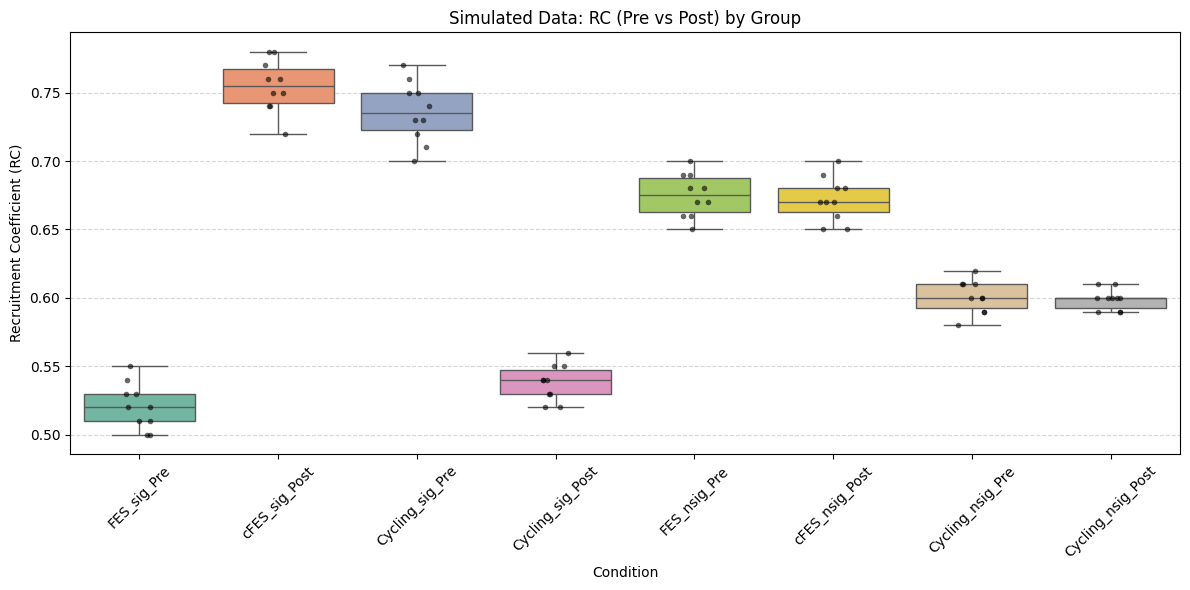

In [4]:
# ---------------------------
# Organize Data into DataFrame
# ---------------------------

groups = (
    ['FES_sig_Pre'] * 10 + ['cFES_sig_Post'] * 10 +
    ['Cycling_sig_Pre'] * 10 + ['Cycling_sig_Post'] * 10 +
    ['FES_nsig_Pre'] * 10 + ['cFES_nsig_Post'] * 10 +
    ['Cycling_nsig_Pre'] * 10 + ['Cycling_nsig_Post'] * 10
)

values = np.concatenate([
    pre_rec_SMN_cfes_sig, post_rec_SMN_cfes_sig,
    pre_rec_SMN_cyc_sig, post_rec_SMN_cyc_sig,
    pre_rec_SMN_cfes_nsig, post_rec_SMN_cfes_nsig,
    pre_rec_SMN_cyc_nsig, post_rec_SMN_cyc_nsig
])

df = pd.DataFrame({'Group': groups, 'Value': values})

# ---------------------------
# Box Plot with Strip Overlay
# ---------------------------

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Value', data=df, palette='Set2')
sns.stripplot(x='Group', y='Value', data=df, color='black', size=4, jitter=True, alpha=0.6)

plt.title('Simulated Data: RC (Pre vs Post) by Group')
plt.ylabel('Recruitment Coefficient (RC)')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
def paired_perm_test(pre, post, nmc=1024, verbose=True):
    """
    Paired permutation test for dependent samples (subject-wise).
    Returns p-value for each index (len = n).
    """
    pre = np.asarray(pre)
    post = np.asarray(post)
    n = len(pre)
    diff_obs = np.abs(post - pre)  # |post - pre| for each subject

    # For regionwise stats, just treat each subject as a "region" (or use axis if 2D)
    exceedances = np.zeros(n)
    diffs = post - pre

    # Each permutation: flip the sign of the difference or not (paired test)
    rng = np.random.default_rng(42)
    for i in range(nmc):
        signs = rng.choice([-1, 1], size=n)
        perm_diffs = signs * diffs
        perm_abs = np.abs(perm_diffs)
        exceedances += perm_abs >= diff_obs # how many times perm is more that observe diff.
        if verbose and i < 5:
            print(f"Permutation {i+1}: {perm_abs}")
    pvals = exceedances / nmc
    return pvals

In [6]:
# Run for each group
print("FES Group (Significant):")
pval_fes_sig = paired_perm_test(pre_rec_SMN_cfes_sig, post_rec_SMN_cfes_sig)
print("p-values:", pval_fes_sig, "\n")

print("Passive Cycling Group (Significant):")
pval_cyc_sig = paired_perm_test(pre_rec_SMN_cyc_sig, post_rec_SMN_cyc_sig)
print("p-values:", pval_cyc_sig, "\n")

print("FES Group (Non-Significant):")
pval_fes_nsig = paired_perm_test(pre_rec_SMN_cfes_nsig, post_rec_SMN_cfes_nsig)
print("p-values:", pval_fes_nsig, "\n")

print("Passive Cycling Group (Non-Significant):")
pval_cyc_nsig = paired_perm_test(pre_rec_SMN_cyc_nsig, post_rec_SMN_cyc_nsig)
print("p-values:", pval_cyc_nsig, "\n")

FES Group (Significant):
Permutation 1: [0.22 0.23 0.22 0.27 0.21 0.25 0.22 0.24 0.23 0.25]
Permutation 2: [0.22 0.23 0.22 0.27 0.21 0.25 0.22 0.24 0.23 0.25]
Permutation 3: [0.22 0.23 0.22 0.27 0.21 0.25 0.22 0.24 0.23 0.25]
Permutation 4: [0.22 0.23 0.22 0.27 0.21 0.25 0.22 0.24 0.23 0.25]
Permutation 5: [0.22 0.23 0.22 0.27 0.21 0.25 0.22 0.24 0.23 0.25]
p-values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Passive Cycling Group (Significant):
Permutation 1: [0.15 0.18 0.19 0.22 0.18 0.22 0.23 0.2  0.22 0.19]
Permutation 2: [0.15 0.18 0.19 0.22 0.18 0.22 0.23 0.2  0.22 0.19]
Permutation 3: [0.15 0.18 0.19 0.22 0.18 0.22 0.23 0.2  0.22 0.19]
Permutation 4: [0.15 0.18 0.19 0.22 0.18 0.22 0.23 0.2  0.22 0.19]
Permutation 5: [0.15 0.18 0.19 0.22 0.18 0.22 0.23 0.2  0.22 0.19]
p-values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

FES Group (Non-Significant):
Permutation 1: [0.01 0.   0.01 0.01 0.01 0.   0.01 0.01 0.01 0.02]
Permutation 2: [0.01 0.   0.01 0.01 0.01 0.   0.01 0.01 0.01 0.02]
Permutation 3: [0

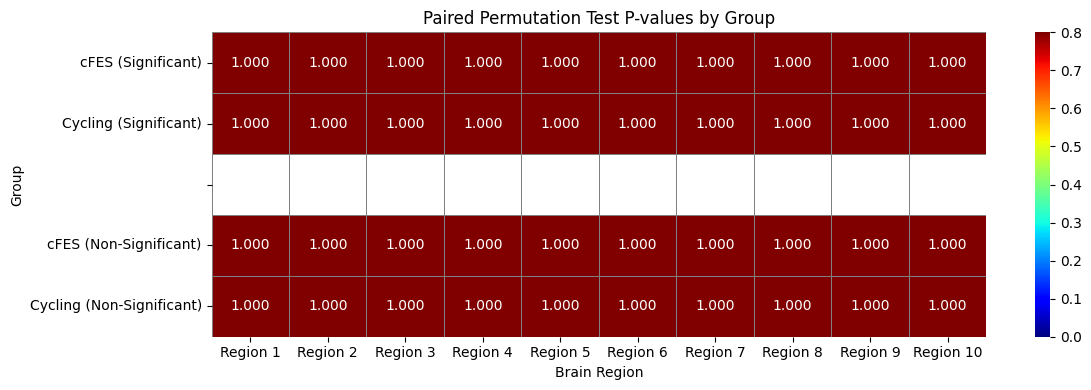

In [7]:

# Stack the p-values into a matrix with a blank row in between groups
empty_row = np.full(10, np.nan)
pval_matrix = np.vstack([
    pval_fes_sig,
    pval_cyc_sig,
    empty_row,           # spacer row
    pval_fes_nsig,
    pval_cyc_nsig
])

# Labels
row_labels = [
    'cFES (Significant)',
    'Cycling (Significant)',
    '',
    'cFES (Non-Significant)',
    'Cycling (Non-Significant)'
]
col_labels = [f'Region {i+1}' for i in range(10)]

# Plotting
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    pval_matrix,
    annot=True,
    fmt=".3f",
    cmap='jet',
    xticklabels=col_labels,
    yticklabels=row_labels,
    cbar=True,
    vmin=0, vmax=0.8,
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Paired Permutation Test P-values by Group")
plt.xlabel("Brain Region")
plt.ylabel("Group")
plt.tight_layout()
plt.show()


### Two-sample permutation test 

In [8]:
# Data generation and simple statistical test

# Simulate clear separation for significant group (cFES vs Cycling)
delta_rec_fes_SMN_sig = np.array([0.80, 0.77, 0.85, 0.82, 0.79, 0.81, 0.83, 0.78, 0.82, 0.84])
delta_rec_cyc_SMN_sig = np.array([0.60, 0.59, 0.62, 0.58, 0.63, 0.61, 0.65, 0.64, 0.60, 0.62])

# Simulate overlapping values for non-significant group
delta_rec_fes_SMN_nsig = np.array([0.68, 0.67, 0.70, 0.69, 0.71, 0.66, 0.68, 0.70, 0.69, 0.68])
delta_rec_cyc_SMN_nsig = np.array([0.67, 0.68, 0.69, 0.70, 0.68, 0.67, 0.69, 0.68, 0.70, 0.69])

# ---------------------------
# Confirm Mean Differences
# ---------------------------
print("Mean difference (cFES vs Cycling) for significant group:", 
      np.mean(delta_rec_fes_SMN_sig - delta_rec_cyc_SMN_sig))  # Expect >> 0.1

print("Mean difference (cFES vs Cycling) for non-significant group:", 
      np.mean(delta_rec_fes_SMN_nsig - delta_rec_cyc_SMN_nsig))  # Expect ~ 0

# ---------------------------
# Optional: Create a DataFrame for Summary Statistics
# ---------------------------
data = {
    'Group': (['cFES_sig'] * 10 + ['Cycling_sig'] * 10 +
              ['cFES_nsig'] * 10 + ['Cycling_nsig'] * 10),
    'Value': np.concatenate([
        delta_rec_fes_SMN_sig,
        delta_rec_cyc_SMN_sig,
        delta_rec_fes_SMN_nsig,
        delta_rec_cyc_SMN_nsig
    ])
}

df = pd.DataFrame(data)

# ---------------------------
# Print Mean and Std per Group
# ---------------------------
print("\nMean and Standard Deviation for each group:")
for group in df['Group'].unique():
    group_data = df[df['Group'] == group]['Value']
    print(f"{group:15s}  Mean = {group_data.mean():.4f}  Std = {group_data.std(ddof=1):.4f}")


Mean difference (cFES vs Cycling) for significant group: 0.197
Mean difference (cFES vs Cycling) for non-significant group: 0.0010000000000000009

Mean and Standard Deviation for each group:
cFES_sig         Mean = 0.8110  Std = 0.0260
Cycling_sig      Mean = 0.6140  Std = 0.0222
cFES_nsig        Mean = 0.6860  Std = 0.0151
Cycling_nsig     Mean = 0.6850  Std = 0.0108


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_97165/353636650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=df, palette='Set2')


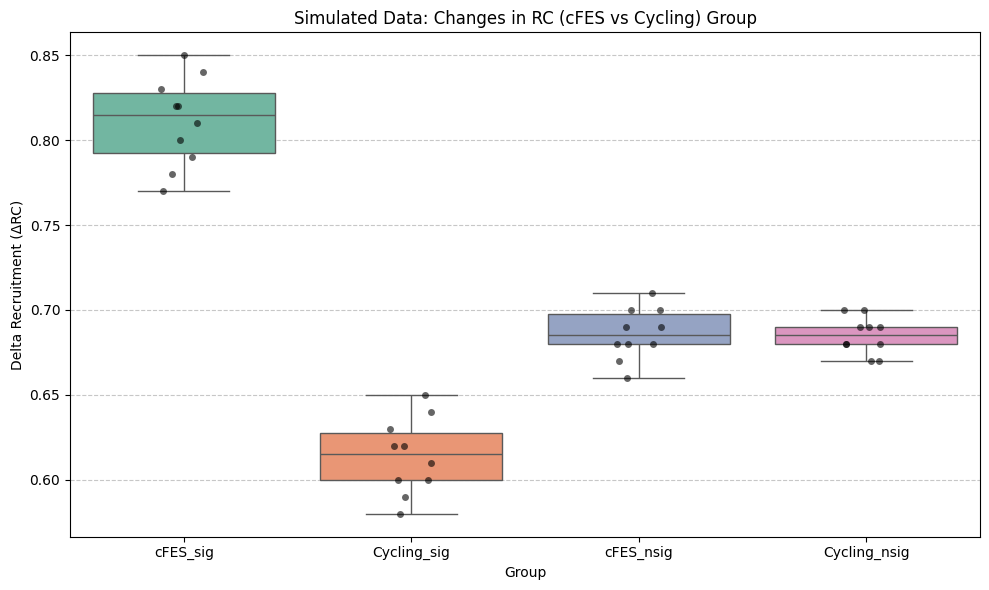

In [9]:
# ---------------------------
# Box Plot
# ---------------------------

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df, palette='Set2')
sns.stripplot(x='Group', y='Value', data=df, color='black', size=5, jitter=True, alpha=0.6)

plt.title('Simulated Data: Changes in RC (cFES vs Cycling) Group')
plt.ylabel('Delta Recruitment (ΔRC)')
plt.xlabel('Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:

def two_sample_perm_test(delta_cfes_rec, delta_cycling_rec, nmc=20000, verbose=False):
    """
    Permutation test for independent changes in recruitment coefficient between
    FES + Cycling and Passive Cycling groups.
    Elementwise test: p-value per element.
    """
    delta_cfes = np.array(delta_cfes_rec)
    delta_cycling = np.array(delta_cycling_rec)

    assert delta_cfes.shape == delta_cycling.shape, "Both groups must have same shape"
    n = delta_cfes.shape[0]

    observed_diff = np.abs(delta_cfes - delta_cycling)
    k = np.zeros(n)
    rng = np.random.default_rng(42)

    for i in range(nmc):
        # Randomly flip each pair (elementwise label permutation)
        flip_mask = rng.random(n) < 0.5
        perm1 = np.where(flip_mask, delta_cfes, delta_cycling)
        perm2 = np.where(flip_mask, delta_cycling, delta_cfes)
        perm_diff = np.abs(perm1 - perm2)
        k += observed_diff < perm_diff
        if verbose and i < 5:
            print(f"Permutation {i+1}: perm_diff = {perm_diff}")

    pvals = k / nmc
    return pvals


In [11]:
# Test on significant group
pvals_sig = two_sample_perm_test(delta_rec_fes_SMN_sig, delta_rec_cyc_SMN_sig, nmc=20000, verbose=True)
print("Elementwise p-values (significant group):", pvals_sig)

# Test on Non-significant group
pvals_nsig = two_sample_perm_test(delta_rec_fes_SMN_nsig, delta_rec_cyc_SMN_nsig, nmc=20000, verbose=True)
print("Elementwise p-values (non-significant group):", pvals_nsig)

Permutation 1: perm_diff = [0.2  0.18 0.23 0.24 0.16 0.2  0.18 0.14 0.22 0.22]
Permutation 2: perm_diff = [0.2  0.18 0.23 0.24 0.16 0.2  0.18 0.14 0.22 0.22]
Permutation 3: perm_diff = [0.2  0.18 0.23 0.24 0.16 0.2  0.18 0.14 0.22 0.22]
Permutation 4: perm_diff = [0.2  0.18 0.23 0.24 0.16 0.2  0.18 0.14 0.22 0.22]
Permutation 5: perm_diff = [0.2  0.18 0.23 0.24 0.16 0.2  0.18 0.14 0.22 0.22]
Elementwise p-values (significant group): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Permutation 1: perm_diff = [0.01 0.01 0.01 0.01 0.03 0.01 0.01 0.02 0.01 0.01]
Permutation 2: perm_diff = [0.01 0.01 0.01 0.01 0.03 0.01 0.01 0.02 0.01 0.01]
Permutation 3: perm_diff = [0.01 0.01 0.01 0.01 0.03 0.01 0.01 0.02 0.01 0.01]
Permutation 4: perm_diff = [0.01 0.01 0.01 0.01 0.03 0.01 0.01 0.02 0.01 0.01]
Permutation 5: perm_diff = [0.01 0.01 0.01 0.01 0.03 0.01 0.01 0.02 0.01 0.01]
Elementwise p-values (non-significant group): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


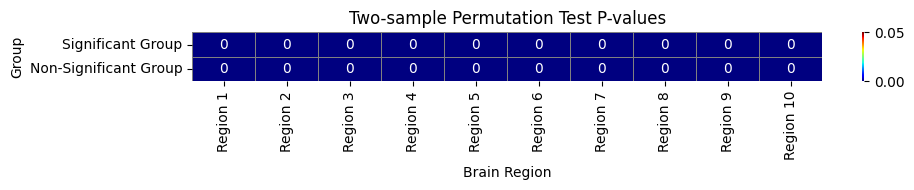

In [12]:
# Combine into a 2-row matrix for visualization
pval_matrix = np.vstack([pvals_sig, pvals_nsig])

# Row and column labels
group_labels = ['Significant Group', 'Non-Significant Group']
region_labels = [f'Region {i+1}' for i in range(10)]

# Create the heatmap
plt.figure(figsize=(10, 2))
ax = sns.heatmap(pval_matrix, annot=True, cmap='jet', cbar=True, # jet viridis_r
                 xticklabels=region_labels, yticklabels=group_labels,
                 vmin=0, vmax=0.05, linewidths=0.5, linecolor='gray')

plt.title('Two-sample Permutation Test P-values')
plt.xlabel('Brain Region')
plt.ylabel('Group')
plt.tight_layout()
plt.show()
